In [79]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

import os
from time import time
from time import sleep

import seaborn as sns
import matplotlib as plt

In [40]:
pwd = os.getcwd()

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',  # top 10
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'be418cc8-d60e-4d91-85a8-2bfae177f020',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)  # Commented out so I don't get a huge wall of data
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

json normalize

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])

Add Timestamp column

In [6]:
df["timestamp"] = pd.Timestamp("now")  # Take timestamp and date as of right now

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9746,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.915323e+07,1.915323e+07,NaN,1,None,None,None,2022-09-17T16:22:00.000Z,20133.003235,2.707993e+10,-5.7844,1.137597,2.748354,-5.101517,-14.020089,-12.683237,2.446549,3.856121e+11,39.5300,4.227931e+11,None,2022-09-17T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:24:42.228768
1,1027,Ethereum,ETH,ethereum,6092,2015-08-07T00:00:00.000Z,"[mineable, pos, smart-contracts, ethereum-ecos...",NaN,1.224079e+08,1.224079e+08,NaN,2,None,None,None,2022-09-17T16:22:00.000Z,1464.208891,1.229634e+10,-26.9433,1.730975,1.697334,-14.570284,-21.554290,-5.336029,38.051428,1.792307e+11,18.3845,1.792307e+11,None,2022-09-17T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:24:42.228768
2,825,Tether,USDT,tether,39797,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.792355e+10,7.015678e+10,NaN,3,None,None,None,2022-09-17T16:22:00.000Z,1.000069,3.904749e+10,-12.3793,-0.000764,0.010345,-0.029348,0.002229,0.003945,0.119706,6.792823e+10,6.9585,7.016162e+10,None,2022-09-17T16:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-17 12:24:42.228768
3,3408,USD Coin,USDC,usd-coin,6238,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.021539e+10,5.021539e+10,NaN,4,None,None,None,2022-09-17T16:22:00.000Z,1.000083,4.684373e+09,-6.6255,-0.001952,0.017134,0.014608,0.020143,0.004168,-0.016523,5.021957e+10,5.1408,5.021957e+10,None,2022-09-17T16:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-17 12:24:42.228768
4,1839,BNB,BNB,bnb,1108,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,None,None,None,2022-09-17T16:22:00.000Z,279.434442,6.161865e+08,-24.6315,0.818045,2.124707,-4.514812,-8.262048,5.566034,34.639812,4.508319e+10,4.6152,5.588689e+10,None,2022-09-17T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:24:42.228768
5,4687,Binance USD,BUSD,binance-usd,5111,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,6,None,None,None,2022-09-17T16:22:00.000Z,1.000007,6.971898e+09,-14.4629,-0.004540,0.060598,-0.003569,-0.008177,0.116702,-0.138332,2.051740e+10,2.1003,2.051740e+10,None,2022-09-17T16:22:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-17 12:24:42.228768
6,52,XRP,XRP,xrp,815,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,None,None,None,2022-09-17T16:22:00.000Z,0.374790,1.783838e+09,65.7499,0.533164,12.551814,5.484038,-0.577125,2.054623,18.471298,1.867432e+10,1.9117,3.747905e+10,None,2022-09-17T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:24:42.228768
7,2010,Cardano,ADA,cardano,570,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,None,None,None,2022-09-17T16:22:00.000Z,0.483528,5.462610e+08,7.5457,0.355346,5.189899,-5.912484,-9.841457,-4.081109,3.502363,1.652799e+10,1.6919,2.175878e+10,None,2022-09-17T16:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:24:42.228768
8,5426,Solana,SOL,solana,384,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.539847e+08,5.116169e+08,NaN,9,

Function to automate the API pull

In [36]:
def api_executable():
    global df  # Declare our first data frame as a global variable

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'10',  # top 10
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'be418cc8-d60e-4d91-85a8-2bfae177f020',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)  
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

# Block of code if we wanted to automate the dataframe without a CSV import
    # df_2 = pd.json_normalize(data['data'])  # create a second data frame to append the data
    # df_2["timestamp"] = pd.Timestamp("now")
    # df = pd.concat([df_2, df])  # append the data to the first data frame / pd.concat() is the replacement for append()

# Reformatted for the CSV import
    df = pd.json_normalize(data['data'])
    df["timestamp"] = pd.Timestamp("now")
    df

    if not os.path.isfile(pwd + '\\API.csv'):
        df.to_csv(pwd + '\\API.csv', header='column_names')
    else:
        df.to_csv(pwd + '\\API.csv', mode='a', header=False)


Creating loop to run the function

9/17/2022: For some reason, running this loop is causing the kernel in my_env to die

In [9]:
# for i in range(333):  # 333 credits available for Coinmarketcap API pull
#     api_executable()
#     print("API Executable has completed successfully")
#     sleep(60)  # Sleep for 1 minute
# exit()

In [97]:
api_executable()

Create dataframe to store CSV output

In [98]:
df_csv = pd.read_csv('API.csv')
df_csv.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9746,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19153231.00000,19153231.00000,NaN,1,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,20086.08007,27076557442.37058,-5.69370,0.63817,2.74481,-5.42281,-13.77482,-13.85487,2.51366,384713331493.32806,39.46680,421807681500.83002,NaN,2022-09-17T16:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:42:58.431566
1,1,1027,Ethereum,ETH,ethereum,6092,2015-08-07T00:00:00.000Z,"['mineable', 'pos', 'smart-contracts', 'ethere...",NaN,122407885.49900,122407885.49900,NaN,2,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,1462.94754,12005138048.97403,-29.38940,1.38378,2.61927,-14.80230,-21.28111,-7.18484,38.28498,179076315129.46945,18.37840,179076315129.47000,NaN,2022-09-17T16:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:42:58.431566
2,2,825,Tether,USDT,tether,39798,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,67923548349.18519,70156782826.04665,NaN,3,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,1.00011,38790955108.11527,-13.00860,0.00001,0.01277,-0.02497,0.00574,0.00649,0.12801,67930714807.97220,6.96780,70164184908.31000,NaN,2022-09-17T16:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-17 12:42:58.431566
3,3,3408,USD Coin,USDC,usd-coin,6238,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,50215390254.98373,50215390254.98373,NaN,4,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,1.00014,4634733694.52305,-7.84250,-0.00508,0.01312,0.01748,0.03693,-0.00887,-0.00871,50222345400.82282,5.15000,50222345400.82000,NaN,2022-09-17T16:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-17 12:42:58.431566
4,4,1839,BNB,BNB,bnb,1108,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,278.79286,605867721.93165,-26.50540,0.48801,2.25681,-4.83994,-7.77897,4.48497,34.93793,44979676758.14792,4.61620,55758572389.62000,NaN,2022-09-17T16:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:42:58.431566


Data cleaning

In [52]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # convert scientific notation values to float


In [61]:
df_csv.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9746,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19153231.00000,19153231.00000,NaN,1,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,20086.08007,27076557442.37058,-5.69370,0.63817,2.74481,-5.42281,-13.77482,-13.85487,2.51366,384713331493.32806,39.46680,421807681500.83002,NaN,2022-09-17T16:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:42:58.431566
1,1,1027,Ethereum,ETH,ethereum,6092,2015-08-07T00:00:00.000Z,"['mineable', 'pos', 'smart-contracts', 'ethere...",NaN,122407885.49900,122407885.49900,NaN,2,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,1462.94754,12005138048.97403,-29.38940,1.38378,2.61927,-14.80230,-21.28111,-7.18484,38.28498,179076315129.46945,18.37840,179076315129.47000,NaN,2022-09-17T16:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:42:58.431566
2,2,825,Tether,USDT,tether,39798,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,67923548349.18519,70156782826.04665,NaN,3,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,1.00011,38790955108.11527,-13.00860,0.00001,0.01277,-0.02497,0.00574,0.00649,0.12801,67930714807.97220,6.96780,70164184908.31000,NaN,2022-09-17T16:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-17 12:42:58.431566
3,3,3408,USD Coin,USDC,usd-coin,6238,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,50215390254.98373,50215390254.98373,NaN,4,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,1.00014,4634733694.52305,-7.84250,-0.00508,0.01312,0.01748,0.03693,-0.00887,-0.00871,50222345400.82282,5.15000,50222345400.82000,NaN,2022-09-17T16:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-17 12:42:58.431566
4,4,1839,BNB,BNB,bnb,1108,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-09-17T16:41:00.000Z,278.79286,605867721.93165,-26.50540,0.48801,2.25681,-4.83994,-7.77897,4.48497,34.93793,44979676758.14792,4.61620,55758572389.62000,NaN,2022-09-17T16:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:42:58.431566


In [63]:
df_csv2 = df_csv.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()  # average 
df_csv2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.61661,2.72157,-5.45281,-13.76788,-13.86156,2.54295
Ethereum,1.32176,2.53102,-14.83487,-21.29142,-7.20798,38.30104
Tether,-0.00075,0.01155,-0.02628,0.00518,0.00346,0.12803
USD Coin,-0.00532,0.01105,0.01030,0.03060,0.00378,-0.00806
BNB,0.46595,2.20375,-4.85799,-7.79081,4.44717,34.95922
Binance USD,-0.08144,-0.00078,-0.00281,-0.03850,-0.00440,-0.04843
XRP,0.35025,12.52854,5.41430,-0.12284,0.73759,18.53519
Cardano,0.11283,5.63363,-5.72897,-8.53330,-5.56119,3.71435
Solana,0.42979,4.58384,-3.34314,-17.93771,-29.08598,2.19095


Above dataframe will have issues with visualizing because the column headers need to be pivoted into rows

I.e. Stacking

In [66]:
df_csv3 = df_csv2.stack()
df_csv3

name                                     
Bitcoin      quote.USD.percent_change_1h      0.61661
             quote.USD.percent_change_24h     2.72157
             quote.USD.percent_change_7d     -5.45281
             quote.USD.percent_change_30d   -13.76788
             quote.USD.percent_change_60d   -13.86156
             quote.USD.percent_change_90d     2.54295
Ethereum     quote.USD.percent_change_1h      1.32176
             quote.USD.percent_change_24h     2.53102
             quote.USD.percent_change_7d    -14.83487
             quote.USD.percent_change_30d   -21.29142
             quote.USD.percent_change_60d    -7.20798
             quote.USD.percent_change_90d    38.30104
Tether       quote.USD.percent_change_1h     -0.00075
             quote.USD.percent_change_24h     0.01155
             quote.USD.percent_change_7d     -0.02628
             quote.USD.percent_change_30d     0.00518
             quote.USD.percent_change_60d     0.00346
             quote.USD.percent_change_90

In [68]:
type(df_csv2)  # data frame

pandas.core.frame.DataFrame

In [69]:
type(df_csv3)  # Series; we want to get it back into a data frame

pandas.core.series.Series

In [73]:
df_csv4 = df_csv3.to_frame(name='values')  # the name of the mean values
df_csv4.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.61661
        quote.USD.percent_change_24h   2.72157
        quote.USD.percent_change_7d   -5.45281
        quote.USD.percent_change_30d -13.76788
        quote.USD.percent_change_60d -13.86156

In [71]:
type(df_csv4)

pandas.core.frame.DataFrame

In [74]:
df_csv4.reset_index(inplace=True)
df_csv4.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.61661
1,Bitcoin,quote.USD.percent_change_24h,2.72157
2,Bitcoin,quote.USD.percent_change_7d,-5.45281
3,Bitcoin,quote.USD.percent_change_30d,-13.76788
4,Bitcoin,quote.USD.percent_change_60d,-13.86156


In [77]:
df_csv4 = df_csv4.rename(columns={'level_1': 'percent_change'})  # column name change

In [87]:
df_csv4.head()

,name,percent_change,values
0,Bitcoin,1h,0.61661
1,Bitcoin,24h,2.72157
2,Bitcoin,7d,-5.45281
3,Bitcoin,30d,-13.76788
4,Bitcoin,60d,-13.86156


Clean 'percent_change' column

In [86]:
df_csv4['percent_change'] = df_csv4['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df_csv4['percent_change'] = df_csv4['percent_change'].replace(['quote.USD.percent_change_24h'], ['24h'])
df_csv4['percent_change'] = df_csv4['percent_change'].replace(['quote.USD.percent_change_7d'], ['7d'])
df_csv4['percent_change'] = df_csv4['percent_change'].replace(['quote.USD.percent_change_30d'], ['30d'])
df_csv4['percent_change'] = df_csv4['percent_change'].replace(['quote.USD.percent_change_60d'], ['60d'])
df_csv4['percent_change'] = df_csv4['percent_change'].replace(['quote.USD.percent_change_90d'], ['90d'])

Data Visualization

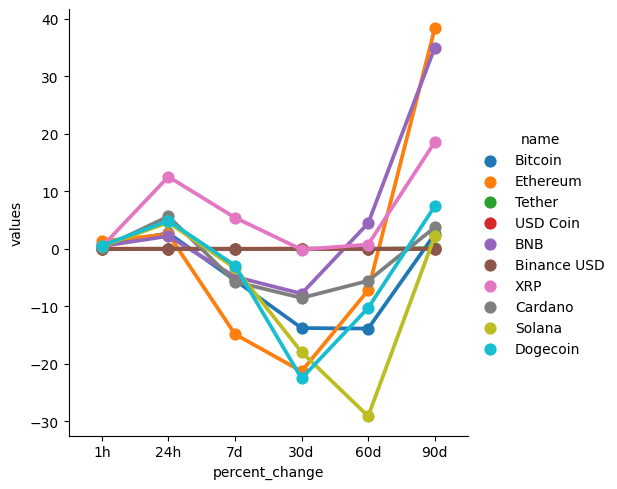

In [88]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_csv4, kind='point')

In [99]:
df_csv5 = df_csv[['name', 'quote.USD.price', 'timestamp']]
df_csv5 = df_csv5.query("name == 'Bitcoin'")
df_csv5

,name,quote.USD.price,timestamp
0,Bitcoin,20086.08007,2022-09-17 12:42:58.431566
10,Bitcoin,20086.08007,2022-09-17 12:43:01.281789
20,Bitcoin,20092.32161,2022-09-17 12:45:48.205504
30,Bitcoin,20105.26532,2022-09-17 13:26:57.370512
40,Bitcoin,20105.26532,2022-09-17 13:27:06.266219


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

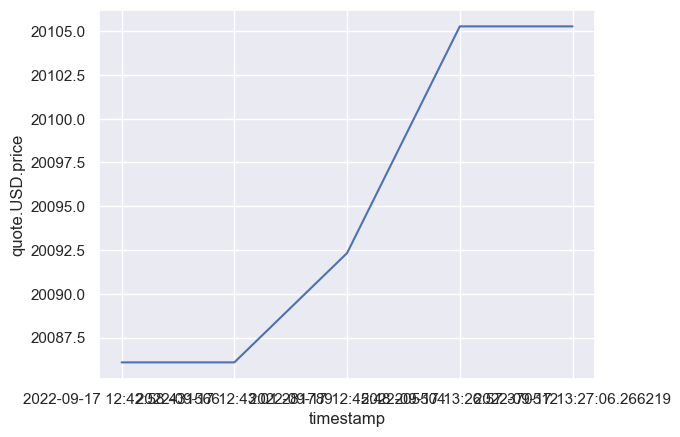

In [102]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_csv5)